# **COMP3401 Assignment 2**
---

## **Exercise 1.2: Determining Feature Importance with Decision Trees**

In [38]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [39]:
file_path = '/content/drive/MyDrive/COMP 3401/COMP 3401 - A2/cancer_data.csv'
df = pd.read_csv(file_path)

In [40]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 1. Model Construcon

In [41]:
#Data encoding
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})

In [42]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

### 2. Feature Importance Evaluaon

In [43]:
feature_importances = dt_regressor.feature_importances_

features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

top_features_df = features_df.sort_values(by='Importance', ascending=False).head(10)
top_features_df['Cumulative Importance'] = top_features_df['Importance'].cumsum()

In [44]:
top_features_df

,Feature,Importance,Cumulative Importance
21,radius_worst,0.695594,0.695594
28,concave_points_worst,0.112928,0.808522
22,texture_worst,0.083728,0.892250
16,compactness_se,0.031841,0.924091
25,smoothness_worst,0.014405,0.938496
2,texture_mean,0.011277,0.949773
24,area_worst,0.011086,0.960859
14,area_se,0.009361,0.970220
7,concavity_mean,0.008771,0.978992
26,compactness_worst,0.006892,0.985883


### 3. Visualizaon

In [45]:
top_features_df = top_features_df.set_index('Feature')

In [46]:
top_features_df

,Importance,Cumulative Importance
Feature,,
radius_worst,0.695594,0.695594
concave_points_worst,0.112928,0.808522
texture_worst,0.083728,0.892250
compactness_se,0.031841,0.924091
smoothness_worst,0.014405,0.938496
texture_mean,0.011277,0.949773
area_worst,0.011086,0.960859
area_se,0.009361,0.970220
concavity_mean,0.008771,0.978992


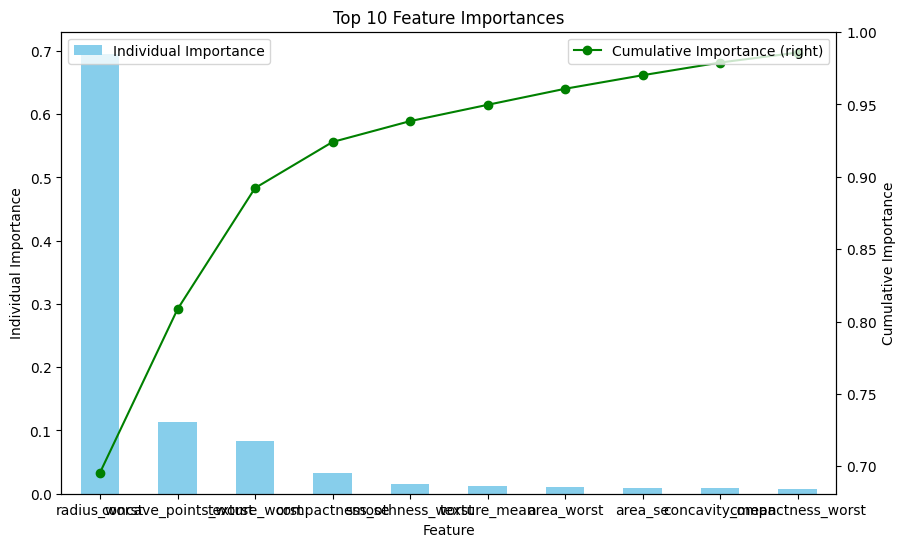

In [47]:
# Create a bar plot for individual importance
ax = top_features_df['Importance'].plot(kind='bar', figsize=(10, 6), color='skyblue', label='Individual Importance')

# Create a line plot for cumulative importance on the same figure
top_features_df['Cumulative Importance'].plot(kind='line', secondary_y=True, marker='o', color='green', label='Cumulative Importance')

# Labels and titles
ax.set_ylabel('Individual Importance')
ax.right_ax.set_ylabel('Cumulative Importance')
ax.set_title('Top 10 Feature Importances')

# Adding legend
ax.legend(loc='upper left')
ax.right_ax.legend(loc='upper right')

plt.show()

### 4. Analysis

The radius_worst feature has the highest individual importance, suggesting it is the most significant predictor in the model.The cumulative importance grows quickly with the initial features and then levels off, showing that each subsequent feature adds less to the model's performance. The top 10 features combined nearly account for the model's total predictive power. Thus making the model efficient.